# Сборный проект

Самое время вспомнить знания, полученные в курсе, и решить ещё один аналитический кейс.
 
 Описание проекта
 
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
Инструкция по выполнению проекта
## Шаг. Открытие файла с данными и изучение общей информации
Путь к файлу: /datasets/games.csv


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Импортируем библиотеки, которые понадобятся в дальнейшей работе, загружаем данные о продажах игр, выводим для начала первые 10 строк и также основную информацию о датафрейме

In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format 
from scipy import stats as st

In [180]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выводим список характерных значений, а также количество явных дубликатов

In [182]:
display(df.describe())
df.duplicated().sum()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


0

Выведем долю пропусков, для наглядности, закрасив градиентом

In [183]:
pd.DataFrame(round(df.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [184]:
#Выведем количество заведений с уникальными названиями
len(df['Name'].unique())

11560

Итого:
* В датафрейме 16715 строк и 11 столбцов
* В столбце `Name` - 11560 уникальных названий заведений, возможно это связано с тем что некоторые одни и те же игры выходили на разных платформах
* Отсутствуют явные дубликаты
* В столбцах `Critic_Score`, `User_Score` и `Rating` почти половина данных отсутствует 
* Доля пропусков столбца `Year_of_Release` составляет - 1.6%, их можно удалить


In [185]:
print('уникальные значения столбца Platform \n')
print(df['Platform'].unique())
print('\n уникальные значения столбца Year_of_Release \n')
print(df['Year_of_Release'].unique())
print('\n уникальные значения столбца Genre \n')
print(df['Genre'].unique())
print('\n уникальные значения столбца Critic_Score \n')
print(df['Critic_Score'].unique())
print('\n уникальные значения столбца User_Score \n')
print(df['User_Score'].unique())
print('\n уникальные значения столбца Rating \n')
print(df['Rating'].unique())

уникальные значения столбца Platform 

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

 уникальные значения столбца Year_of_Release 

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

 уникальные значения столбца Genre 

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

 уникальные значения столбца Critic_Score 

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 3

Рассмотрим значения столбца `Rating`:
- `E` - `Everyone` - Контент подходит для всех возрастов без ограничений. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально `K-A`
- `M` - `Mature` - Контент подходит для 17 и старше. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- `T` - `Teen` - Контент подходит для 13 и старше. Может содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- `E10+` - `Everyone 10+` -Контент подходит для 10 и старше. Может содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- `AO` - `Adults Only 18+` — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- `EC` - `Early childhood` - «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- `RP` - `Rating Pending` - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

исходя из этого, мы можем пустые значения данного столбца переименовать в `RP`, а `K-A` в `E`, так как это было первоначальным наименованием рейтинга

In [186]:
df.loc[df['Rating'] == 'K-A', 'Rating'] = 'E'
df['Rating'] = df['Rating'].fillna('RP')
print('\n уникальные значения столбца Rating \n')
df['Rating'].unique()


 уникальные значения столбца Rating 



array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

Исходя из данных списка характерных значений, а также после рассматривания всех уникальных значений столбцов :
* `Year_of_Release ` - тип данных float64  нужно изменить формат на целочисленный тип int16, так как год имеет целочисленное значение.


- В столбце `User_Score` имеются значения `tbd`, что означает to be determined - будет определено позже. Данные значения запишем как `NaN`. Далее изменим тип на `float16`


In [187]:
df['User_Score'] = df['User_Score'].replace('tbd', float('nan'))

In [188]:
print('\n уникальные значения столбца User_Score \n')
print(df['User_Score'].unique())


 уникальные значения столбца User_Score 

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


## Шаг. Подготовка данных
### Замена названий столбцов (приведение к нижнему регистру);


Для удобства дальнейшей работы, приведем наименования столбцов к нижнему регистру и проверим

In [189]:
#df.columns = [x.lower() for x in df.columns.values]
df.columns = df.columns.str.lower()
df.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Преобразование данных в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;


Для того, чтобы изменить тип данных столбца `year_of_release`, сначала нужно удалить в нем пустые значения и сбросить индексы, так как доля пропусков данного столбца составляет - 1.6%, их можно удалить.

In [190]:
df.dropna(subset=['year_of_release'],inplace=True)
df = df.reset_index(drop = True)
print(df['year_of_release'].isna().sum())

0


Далее, изменяем типы данных и выводим таблицу с общей информацией о датафрейме

In [191]:
#Изменяем типы данных и выводим таблицу с общей информацией о датафрейме

df['year_of_release'] = df['year_of_release'].astype('int16')
df['user_score'] = df['user_score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.3+ MB


### Обработка дубликатов:

Рассмотрим строки с одинаковыми наименованиями игр и одинаковыми платформами

In [192]:
df.loc[df.duplicated(subset = ['name', 'platform']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1575,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.00,8.50,T
11535,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.00,8.50,T
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP
15971,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Выведем все строки имеющие дубликаты и сравним их

In [193]:
display(df.loc[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'X360')])
display(df.loc[(df['name'] == 'Need for Speed: Most Wanted') & (df['platform'] == 'PC')])
display(df.loc[(df['name'].isna())])
display(df.loc[(df['name'] == 'Madden NFL 13') & (df['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1178,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.00,8.50,T
1575,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.00,8.50,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5884,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.00,8.50,T
11535,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.00,8.50,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
15971,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Тут мы видим, что :
- Релиз игры `Need for Speed: Most Wanted` на платформах `X360` и `PC` был в 2005 и 2012 годах, то есть ее перевыпустили и данные строки нужно оставить;
- Игра с пустым наименованием, а также с полупустыми значениями так же удалим;
- У дубликата игры `Madden NFL 13` также имеет полупустые значения данных, избавимся от данной строки

In [194]:
print(df.shape)
df = df.loc[(df.index != 652) & (df.index != 14022) & (df.index != 15971) ]
df = df.reset_index(drop = True)
df.shape

(16446, 11)


(16443, 11)

### Обработка пропусков :

Рассмотрим распределение игр с рейтингом ESRB по годам.

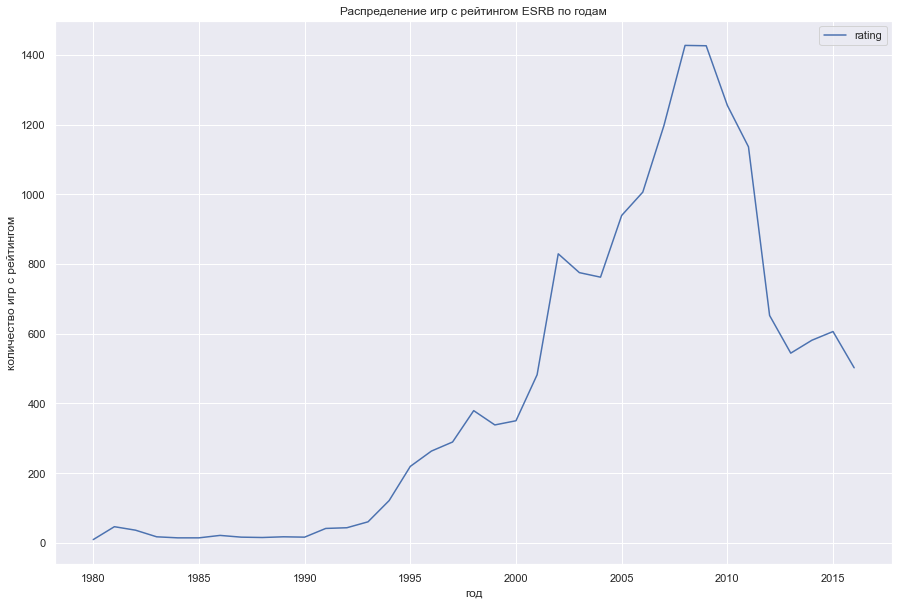

In [195]:
plots = df.groupby('year_of_release')['rating'].count().reset_index().plot(x='year_of_release')
plt.xlabel('год')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

На графике видим, что присвоение рейтинга игр увеличиваетя после 1995 года. Это обусловлено тем, что ESRB была основана в 1994 году.

Еще раз выведем таблицу с долей пропусков:

In [196]:
pd.DataFrame(round(df.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.500000
user_score,54.600000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.3+ MB


. К сожалению, остальные пропуски мы не можем заполнить какими то данными.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


In [198]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


## Шаг. Проведите исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [199]:
df.groupby(by = 'year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

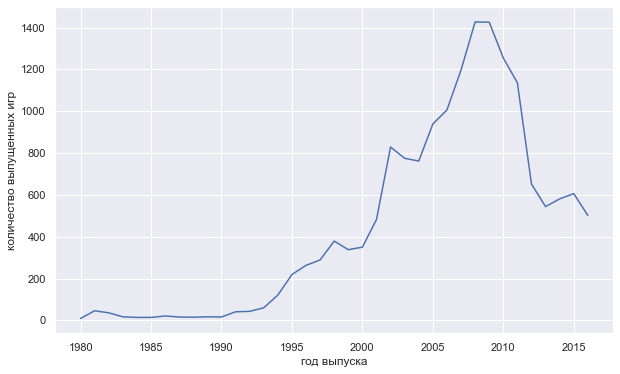

In [200]:
df.groupby(by = 'year_of_release')['name'].count().plot(figsize = [10,6])
plt.xlabel('год выпуска')
plt.ylabel('количество выпущенных игр')

plt.show()

По результатам грфиков видно, что с 1991-го годах начался рост количества выпущенных игр, связано с ростом популярности игровых приставок, а также распостранением ПК в семьях. Заметен самый пик 2008-2010, далее количество выпущенных игр идет на спад, возможно в следствии популярности мобильных игр.


### Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


Сначала выведем графики со всеми платформам и по всем годам в датафрейме

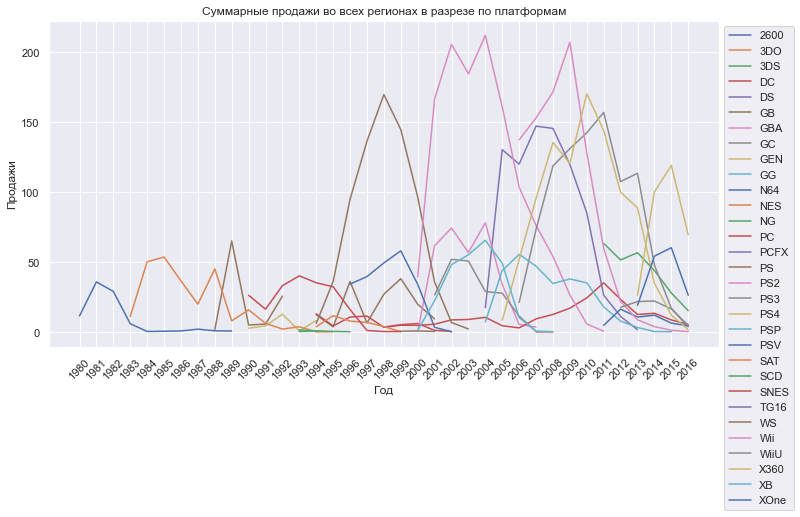

In [201]:
data_top_sales = df.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'sum_sales', 
    aggfunc = 'sum'
    )
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.title('Cуммарные продажи во всех регионах в разрезе по платформам')
plt.show() 

Приблизительная продолжительность срока появления и исчезновения платформы - 10-12 лет, также можно сказать что у большинства платформ есть начало появления платформы, ее развитие, достижение своего пика популярности и далее идет спад. 

Для дальнейшего исследования будем использовать данные с сроком, за который платформы развиваются до своего пика 3-4 года, то есть нам стоит рассмотреть платформы, которые вышли не более 4-х лет назад и которые не переступили за порог своего пика популярности.



Рассмотрим поближе графики жизни платформ за последние 4 года

In [202]:
df_from_2013 = df.query('year_of_release >=2013').reset_index()
display(df_from_2013.head())
df_from_2013.info()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2233 non-null   int64  
 1   name             2233 non-null   object 
 2   platform         2233 non-null   object 
 3   year_of_release  2233 non-null   int16  
 4   genre            2233 non-null   object 
 5   na_sales         2233 non-null   float64
 6   eu_sales         2233 non-null   float64
 7   jp_sales         2233 non-null   float64
 8   other_sales      2233 non-null   float64
 9   critic_score     991 non-null    float64
 10  user_score       1192 non-null   float64
 11  rating           2233 non-null   object 
 12  sum_sales        2233 non-null   float64
dtypes: float64(7), int16(1), int64(1), object(4)
memory usage: 213.8+ KB


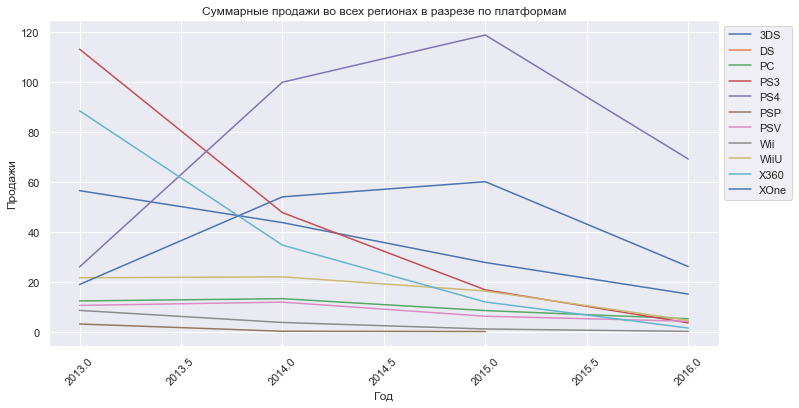

In [203]:
df2013 = df_from_2013.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'sum_sales', 
    aggfunc = 'sum'
    )
ax = df2013.plot(figsize=(12,6))
plt.xticks(rotation = 45)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.title('Cуммарные продажи во всех регионах в разрезе по платформам')
plt.show() 

Рассмотрим тепловую карту сумм продаж во всех регионах в разрезах по годам начиная с 2006(так как приблизительный цикл жизни 10 лет), и по платформам

In [204]:
pivot_platform = df.pivot_table(index='platform', 
                                      values='sum_sales', 
                                      columns = 'year_of_release', 
                                      aggfunc = 'sum', 
                                      fill_value=0, 
                                      margins=True).reset_index()

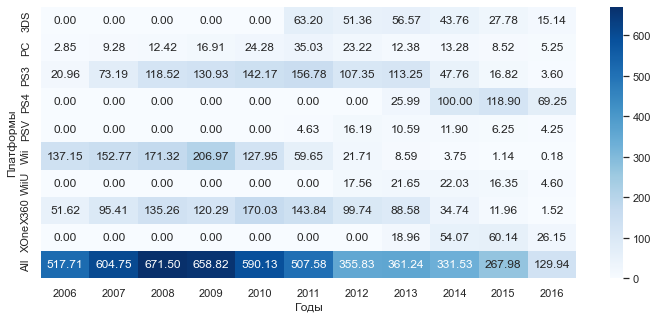

In [205]:
platform_sales_heatmap = pivot_platform.loc[pivot_platform[2016] != 0, 
                   ['platform',2006,2007,2008,2009,2010,2011,2012, 2013, 2014, 2015, 2016]].set_index('platform')

plt.figure(figsize=(12, 5))
sns.heatmap(platform_sales_heatmap, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Из графика и таблицы суммарных продаж видно, что на данный момент популярные платформы - `PS4`, `XBox One`, а также платформа `WiiU` начали продажи с 2012-13-го года, так что находятся на подъеме. Платформы `3DS`, `PS3`, `PSV` переступили порог своего пика. `PC` пока держится. А что касается `PS3`, `Wii`, `XBox 360` - прошли свой пик популярности и ушли на спад.

В дальнейшем будем использовать данные за  последние 4 года, то есть начиная с 2013го.

Рассмотрим суммарные продажи во всех регионах в разрезе по платформам с 2013го года

In [206]:
df_from_2013.groupby(by = 'platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS4    314.14
PS3    181.43
XOne   159.32
3DS    143.25
X360   136.80
WiiU    64.63
PC      39.43
PSV     32.99
Wii     13.66
PSP      3.50
DS       1.54
Name: sum_sales, dtype: float64

Платформы с наибольшими суммарными продажами :
1. PS4
2. PS3
3. XOne       
4. 3DS    
5. X360       
6. WiiU       
7. PC           
8. PSV          

Рассмотрим графики с топ-8 платформами, начиная с 2013го года 

In [207]:
data_top_sales = df_from_2013.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'sum_sales', 
    aggfunc = 'sum'
    )

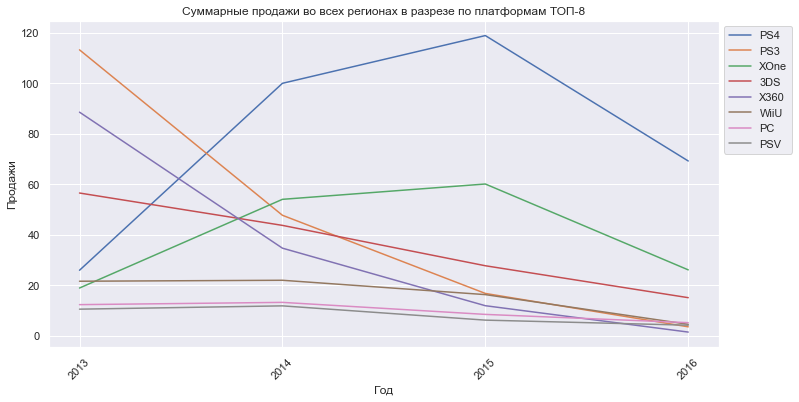

In [208]:
data_top_sales = data_top_sales[['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV']]
ax = data_top_sales.plot(xticks=data_top_sales.index,figsize=(12,6))
plt.xticks(rotation = 45)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.title('Cуммарные продажи во всех регионах в разрезе по платформам ТОП-8')
plt.show() 

По результатам графиков, видим, что лидирующими платформами являются: `PS4`, `XOne`, а также `3DS`, на данные платформы следует обратить внимание.


### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.


Построим график "ящика с усами" по сумме продаж во всех регионах в разрезе по платформам, начиная с 2013го года

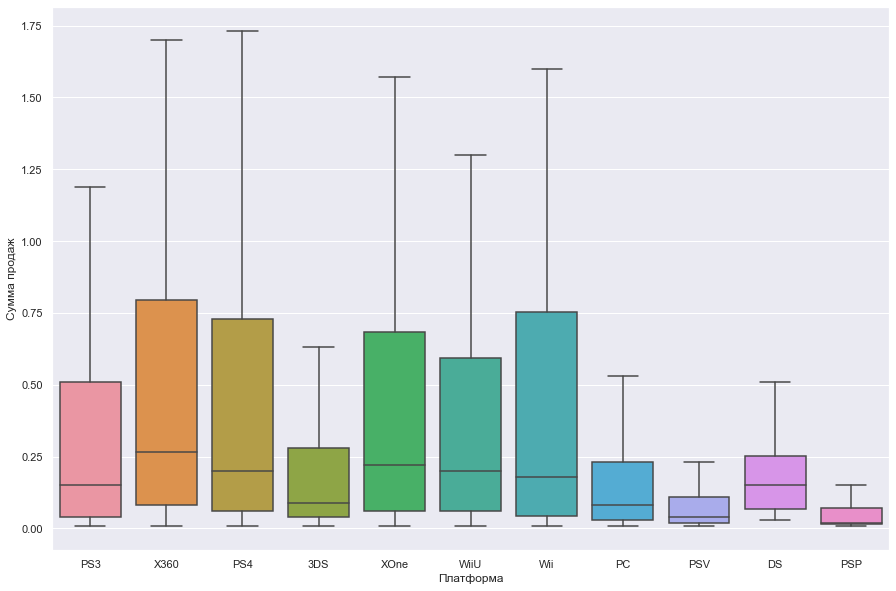

In [209]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=df_from_2013, x='platform', y='sum_sales', showfliers = False)
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

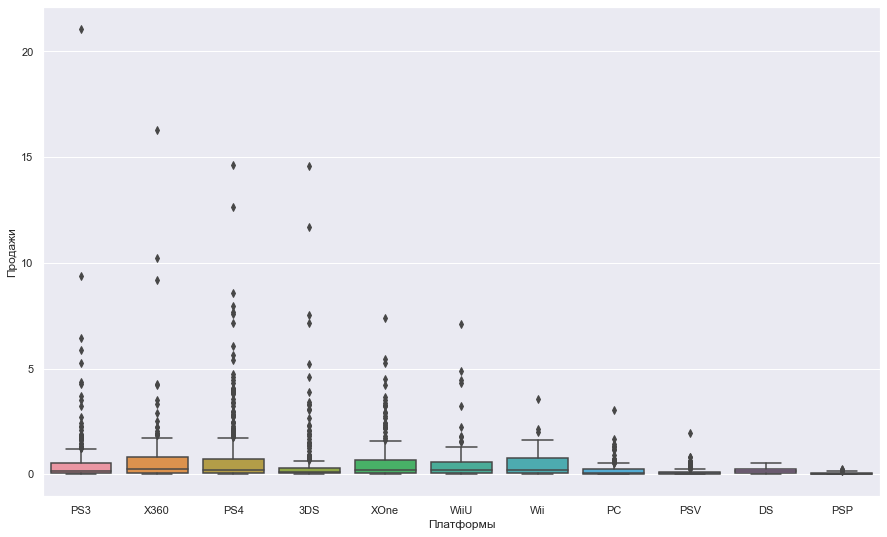

In [210]:
sns.set(rc={'figure.figsize':(15,9)})
sns.boxplot(data=df_from_2013, x='platform', y='sum_sales', showfliers = True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Значения медианы сумм продаж находятся ближе к нижнему краю "ящика с усами", что означает, что на всех платформах выходят игры с небольшими продажами, но несмотря на это, график выбросов  показывает, что иногда выходят игры-хиты. Самые успешные хиты выходили на платформах PlayStation 3, X360, PlayStation 4, а также 3DS.

Медианное значения платформы `WiiU`, находится почти на таком же высоком уровне наравне с топовыми платформами `X360`, `PS4`, `XOne`.

### Посмотрим, как влияют на продажи внутри одной популярной платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

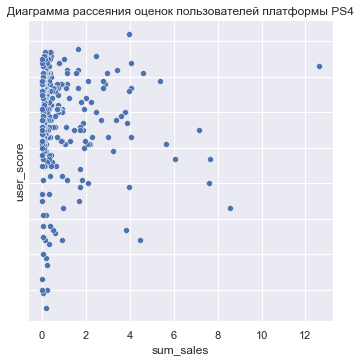

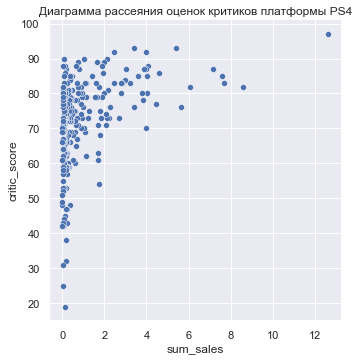

In [211]:
sns.relplot(x='sum_sales', y='user_score',data=df_from_2013.query('platform == "PS4"'))
plt.tick_params(labelleft= False )
plt.title('Диаграмма рассеяния оценок пользователей платформы PS4')
sns.relplot(x='sum_sales', y='critic_score',data=df_from_2013.query('platform == "PS4"'))
plt.title('Диаграмма рассеяния оценок критиков платформы PS4')
plt.show()


In [212]:
df_ps4 = df_from_2013.query('platform == "PS4"')

print(f'Корреляция между оценкой критиков и продажами: {df_ps4.critic_score.corr(df_ps4.sum_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {df_ps4.user_score.corr(df_ps4.sum_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: {df_ps4.critic_score.corr(df_ps4.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.032
Корреляция между оценками критиков и пользователей: 0.56


Рассмотрев диаграммы рассеивания можно сказать, что:
- Чем выше оценка критика, тем выше продажи
- Корелляция между оценкой пользователей и продажами отрицательная, возможно это обусловлено тем, что не все пользователи дают оценку




### Соотнесение выводов с продажами игр на другой платформе.

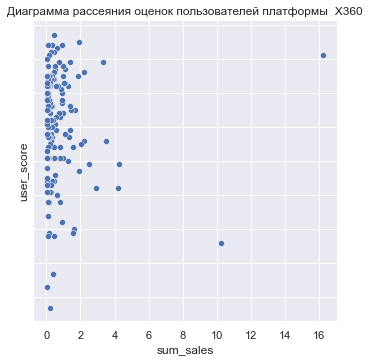

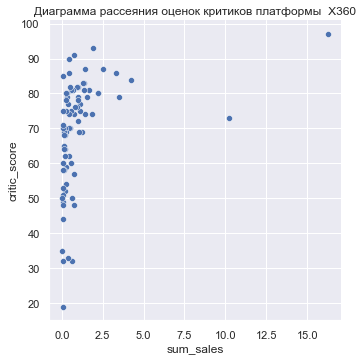

In [213]:
sns.relplot(x='sum_sales', y='user_score',data=df_from_2013.query('platform == "X360"'))
plt.tick_params(labelleft= False )
plt.title('Диаграмма рассеяния оценок пользователей платформы  X360')
sns.relplot(x='sum_sales', y='critic_score',data=df_from_2013.query('platform == "X360"'))
plt.title('Диаграмма рассеяния оценок критиков платформы  X360')
plt.show()

In [214]:
df_x360= df_from_2013.query('platform == "X360"')

print(f'Корреляция между оценкой критиков и продажами: {df_x360.critic_score.corr(df_x360.sum_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {df_x360.user_score.corr(df_x360.sum_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: {df_x360.critic_score.corr(df_x360.user_score):.2}')

Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: -0.012
Корреляция между оценками критиков и пользователей: 0.52


Так же как и с платформой PS4, у X360 чем выше оценка критика, тем выше их продажи. Корелляция между оценкой пользователей и продажами очень низкая, то есть практически не зависят друг от друга.

В результате, можно предположить, что при прогнозе нужно уделить внимание оценке критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [215]:
df_from_2013['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [216]:
df_from_2013.groupby('genre')['sum_sales'].agg('sum').sort_values(ascending = False)

genre
Action         321.87
Shooter        232.98
Sports         150.65
Role-Playing   145.89
Misc            62.82
Platform        42.63
Racing          39.89
Fighting        35.31
Adventure       23.64
Simulation      21.76
Strategy        10.08
Puzzle           3.17
Name: sum_sales, dtype: float64

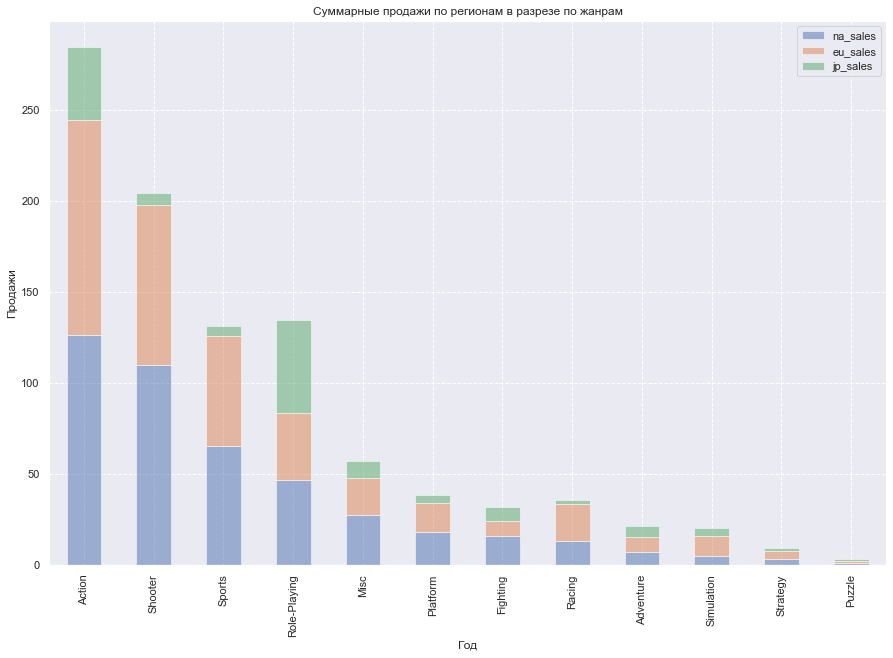

In [217]:
fig, ax = plt.subplots()

df_from_2013.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').sort_values(by = 'na_sales', ascending = False).plot(kind='bar',stacked=True, ax=ax, figsize=(15,10), alpha=0.5)
ylab = ax.set_ylabel('Продажи')
xlab = ax.set_xlabel('Год')
plt.title('Cуммарные продажи по регионам в разрезе по жанрам')
ax.grid(linestyle='--')
plt.show() 


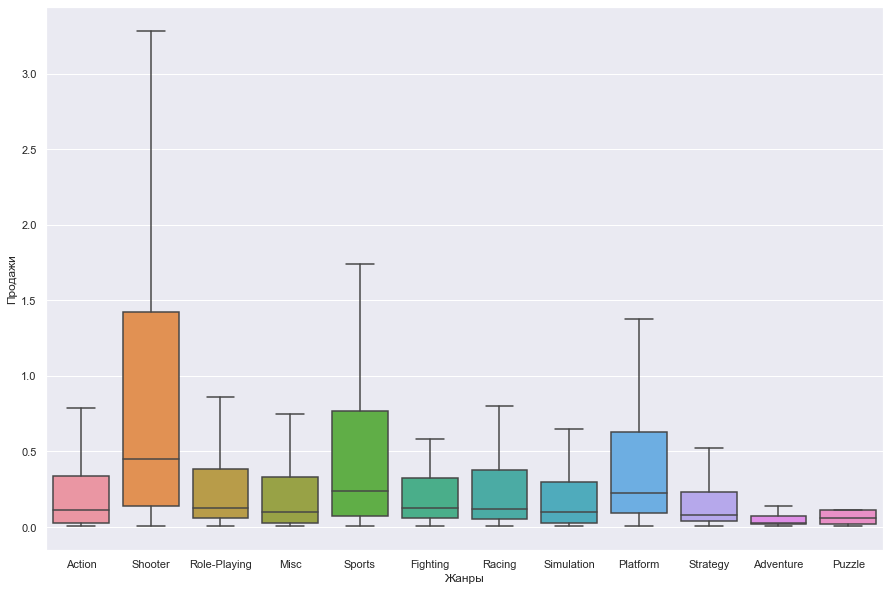

In [218]:
#построим ящик с усами для продаж игр в разрезе жанров
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=df_from_2013, x='genre', y='sum_sales', showfliers=False)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

- Самыми прибыльными жанрами - являются жанры `Action`, `Shooter` и `Sports`.
- Топ 3 по количеству выпущенных игр `Action`, `Misc` и `Sports`.
- Жанр `Puzzle` - имеет наименьшее количество выпусков игр, а также возможно из за этого имеет наименьшую сумму продаж.
- Жанр `Shooter` - сильно смещен вправо, это значит в данном жанре выпускались хитовые игры 

## Шаг. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):


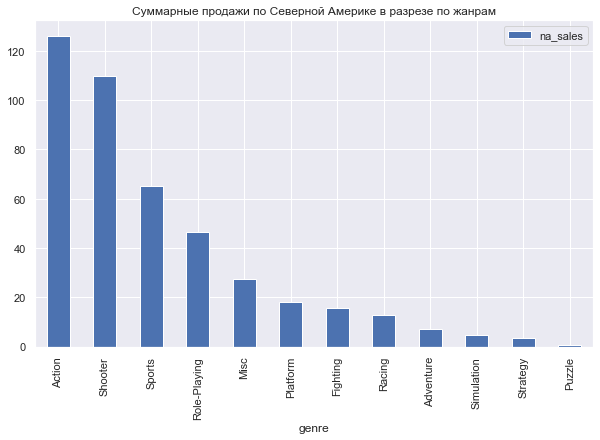

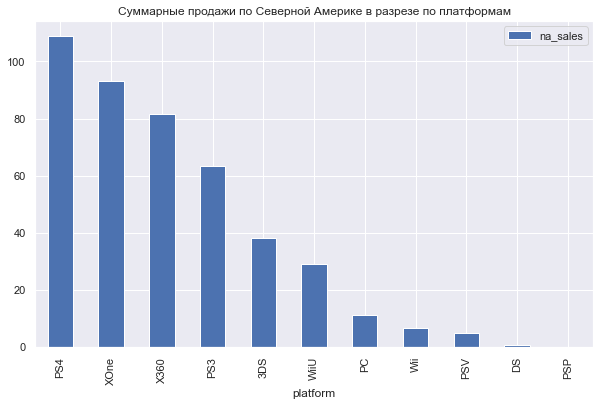

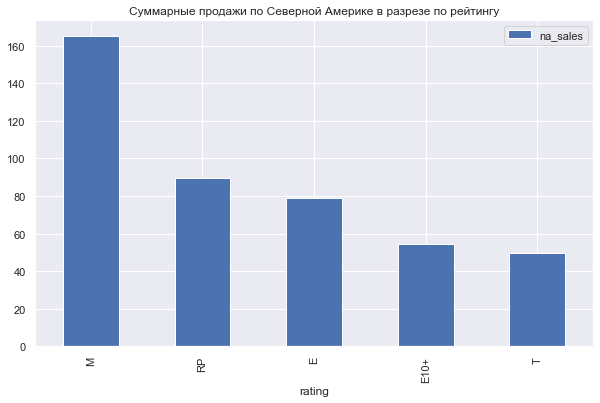

In [219]:
df_from_2013.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Северной Америке в разрезе по жанрам')
plt.show() 

df_from_2013.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Северной Америке в разрезе по платформам')
plt.show() 

df_from_2013.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Северной Америке в разрезе по рейтингу')
plt.show() 

Портрет пользователя Северной Америки:
- Больше приобретают игры с жанрами `Action`, `Shooter` и `Sports`
- Наименее популярные игры `Simulation`, `Strategy`, `Puzzle`
- Чаще всего играют на приставках `PS4`, `XOne`, `X360`, `PS3`
- Популярны рейтинги `M`- `Mature` - Контент подходит для 17 и старше, не заполняют рейтинг `RP`- `Rating Pending` - «Рейтинг ожидается»`RP` и рейтинг `E` - `Everyone` - для всех возрастов.


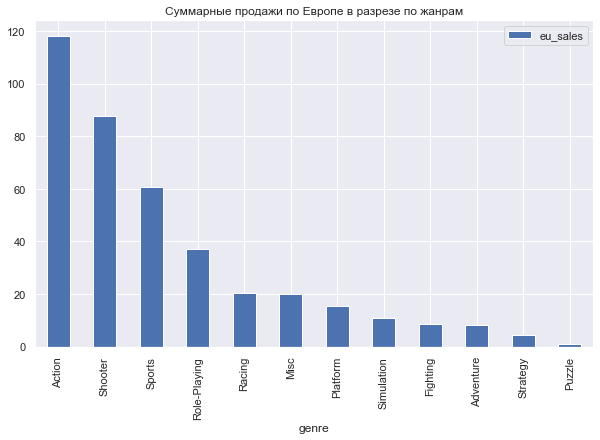

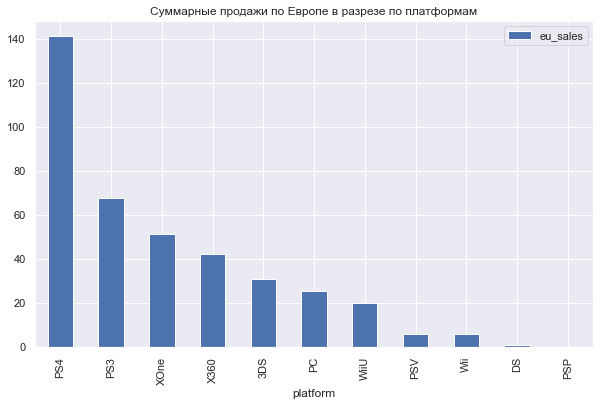

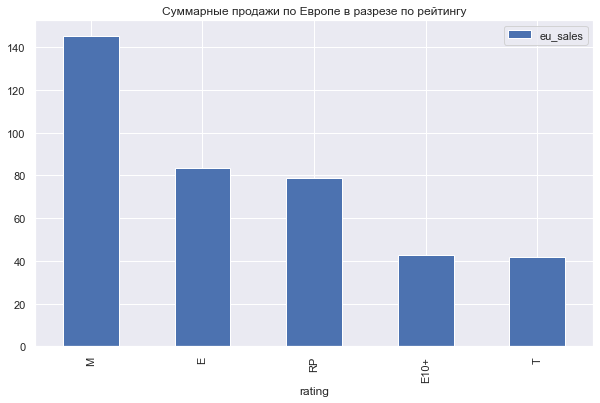

In [220]:
df_from_2013.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Европе в разрезе по жанрам')
plt.show() 

df_from_2013.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Европе в разрезе по платформам')
plt.show() 

df_from_2013.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Европе в разрезе по рейтингу')
plt.show() 

Портрет пользователя Европы:
- Также больше приобретают игры с жанрами `Action`, `Shooter` и `Sports`
- Наименее популярные игры `Adventure`, `Strategy`, `Puzzle`
- Чаще всего играют на приставках `PS4`, `PS3`, `XOne`, `X360`
- Популярны рейтинги `M`- `Mature` - Контент подходит для 17 и старше, `E` - `Everyone` - для всех возрастов.

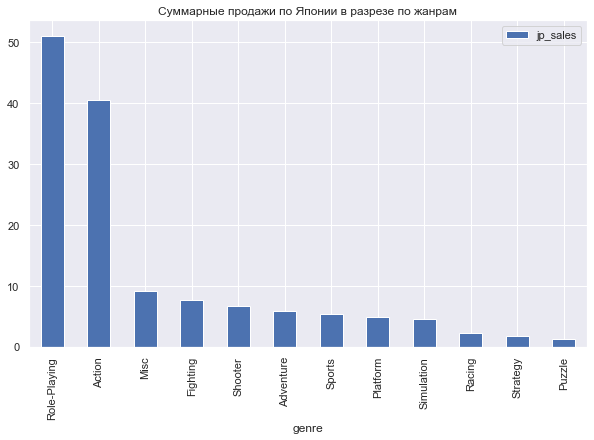

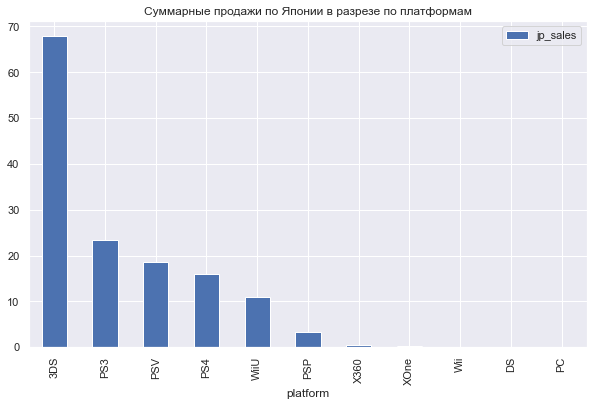

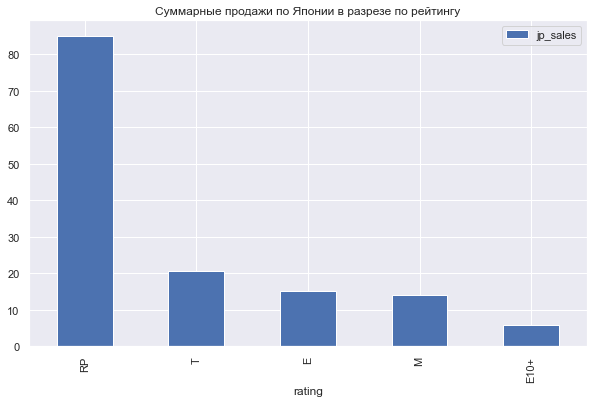

In [221]:
df_from_2013.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Японии в разрезе по жанрам')
plt.show() 

df_from_2013.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Японии в разрезе по платформам')
plt.show() 

df_from_2013.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Cуммарные продажи по Японии в разрезе по рейтингу')
plt.show() 

Портрет пользователя Японии:
- Также больше приобретают игры с жанрами `Role-Playing`, `Action` и `Misc`
- Наименее популярные игры `Rasing`, `Strategy`, `Puzzle`
- Чаще всего играют на приставках `3DS`,`PS3`, `PSV`
- Чаще всего не заполняют рейтинг `RP`- `Rating Pending` - «Рейтинг ожидается», далее идет `T` - `Teen` - Контент подходит для 13 и старше.

Итого:
Регионы различаются своими предподчтениями в жанрах и платформах. В Северной Америке и Европе популярны одни и те же жанры(топ 3) и почти те же платформы. Что касается Японии, так больше популярны платформы - `3DS`, `PS3`, `PSV`

## Шаг. Проверьте гипотезы
Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0:средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1:cредние пользовательские рейтинги платформ Xbox One и PC разные



In [222]:
user_score_xone = df_from_2013.query('platform == "XOne" and user_score > 0')['user_score']
user_score_pc = df_from_2013.query('platform == "PC" and user_score > 0')['user_score']

In [223]:
alpha = 0.05

results = st.ttest_ind(
    user_score_xone,
    user_score_pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: cредние пользовательские рейтинги жанров Action и Sports одинаковые.

H1: cредние пользовательские рейтинги жанров Action и Sports различаются.


In [224]:
user_score_action = df_from_2013.query('genre == "Action" and user_score > 0')['user_score']
user_score_sports = df_from_2013.query('genre == "Sports" and user_score > 0')['user_score']

In [225]:
alpha = 0.05

results = st.ttest_ind(
    user_score_action,
    user_score_sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Cредние пользовательские рейтинги жанров Action и Sports различаются.

## Шаг. Вывод


В результате проведенного исследования данных о продажах игр, выяснили следующее:
- C 1991-го годах начался рост количества выпущенных игр, связано с ростом популярности игровых приставок, а также распостранением ПК в семьях. 
- Заметен самый пик 2008-2010, далее количество выпущенных игр идет на спад, возможно в следствии популярности мобильных игр.
- Приблизительная продолжительность срока появления и исчезновения платформы - 10-12 лет, также можно сказать что у большинства платформ есть начало появления платформы, ее развитие, достижение своего пика популярности и далее идет спад.
- Для исследования мы использовли данные с сроком, за который платформы развиваются до своего пика 3-4 года, то есть мы рассмотрели платформы, которые вышли не более 4-х лет назад.
- Самые популярные платформы на данный момент являются `PS4`, `XOne` а также `3DS`
- Также проверили гипотезы, где определили что:
        - Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        - Cредние пользовательские рейтинги жанров Action и Sports различаются.


**Рекомендации для последующих шагов:**

В результате исследования выяснили, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов:
- Для пользователей Северной Америки и Европы желательны игры с жанрами `Action`, `Shooter` и `Sports` на платформах `PS4`, `PS3`, `XOne`, `X360`. Что касательно Японии - предпочтительны игры жанра `RPG` на платформах `3DS`,`PS3`, `PSV`. Но стоит учитывать что в Северной Америке и Европе находится большая аудиротия пользователей. 
- Самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft. Какое-то время будут актуальны игры для платформ `3DS`;
- Желательно присмотреться к оценкам критиков, по результатам исследования платформ `PS4`, `X360` чем выше оценка критика, тем выше их продажи